# Q2 Rush Hour Rush: A race against time and distance (15 Marks)
## Trip Patterns Over Time and Distance
**Description:** Analyze taxi trip data to understand variations in trip frequency by time, distance, and seasonal patterns. You will need to interpret these visualizations in relation to time-based trends and how they impact taxi usage.

In [61]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData.csv')

### 2.a Trip Frequency by Time of Day, Month, and Day (3 Marks):
(a) Create bar charts to visualize trip distributions for:

• Hours of the Day (to capture daily patterns and peak hours)

• Days of the Week (to identify weekday vs. weekend patterns)

• Months of the Year (to see seasonal trends, if any)

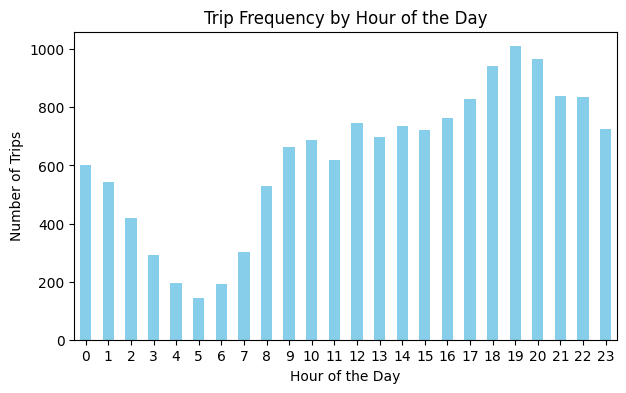

In [62]:
# Bar chart for trip distribution by Hour of the Day
plt.figure(figsize=(7,4))
df['trip_start_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


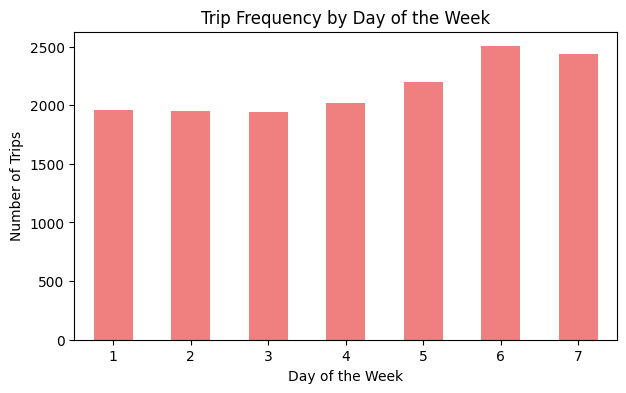

In [63]:
# Bar chart for trip distribution by Day of the Week
plt.figure(figsize=(7,4))
df['trip_start_day'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

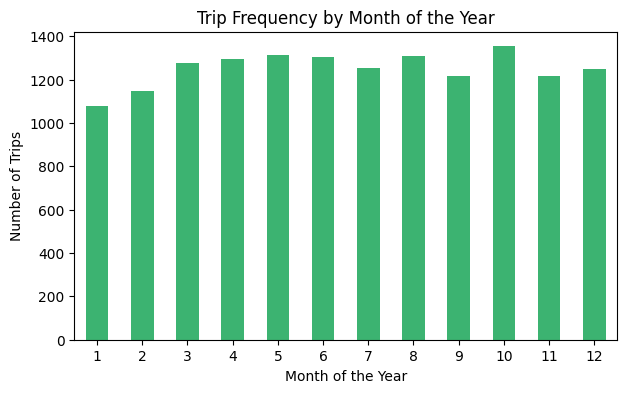

In [64]:

# Bar chart for trip distribution by Month of the Year
plt.figure(figsize=(7,4))
df['trip_start_month'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.title('Trip Frequency by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

(b) Describe notable patterns, like peak hours, high-demand days and peak months. Discuss how these patterns could be relevant for managing taxi demand.

### 2.b Peak Hours and Distance Analysis (3 Marks):

(a) Identify Peak Hours: Create a heatmap showing trip frequency by the hour to identify the busiest hours for taxi trips.

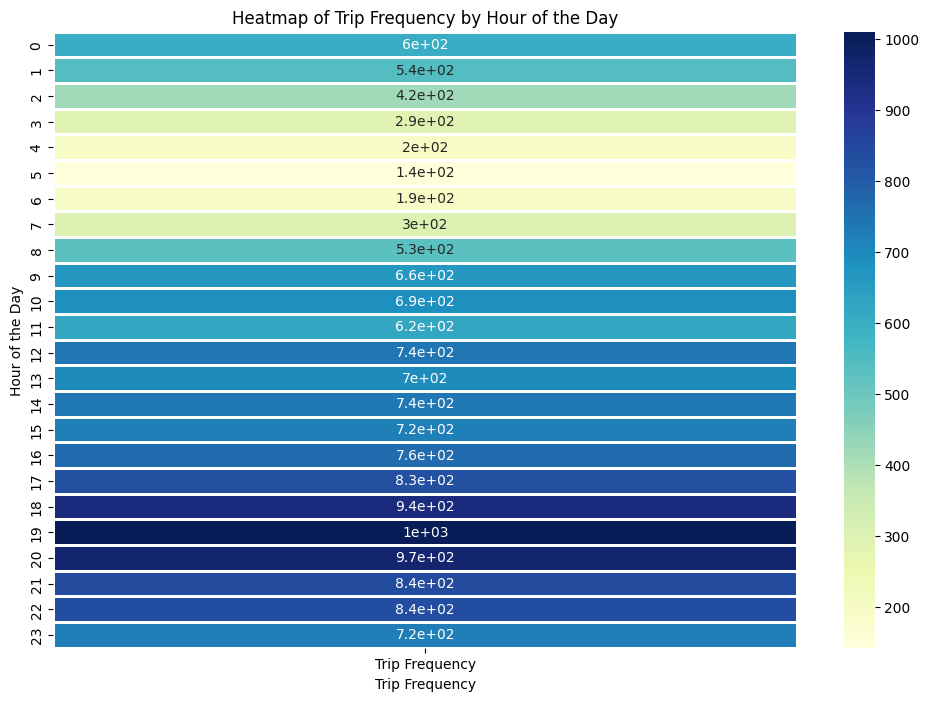

In [65]:
# Creating a DataFrame to calculate trip frequency by hour
hour_counts = df['trip_start_hour'].value_counts().sort_index()
hour_df = pd.DataFrame(hour_counts).reset_index()
hour_df.columns = ['Hour', 'Trip Frequency']

# Creating the heatmap
plt.figure(figsize=(12,8))
hour_pivot = hour_df.pivot_table(index=['Hour'], values='Trip Frequency')
sns.heatmap(hour_pivot, annot=True, cmap="YlGnBu", cbar=True, linewidths=1, linecolor='white')
plt.title("Heatmap of Trip Frequency by Hour of the Day")
plt.xlabel("Trip Frequency")
plt.ylabel("Hour of the Day")
plt.show()

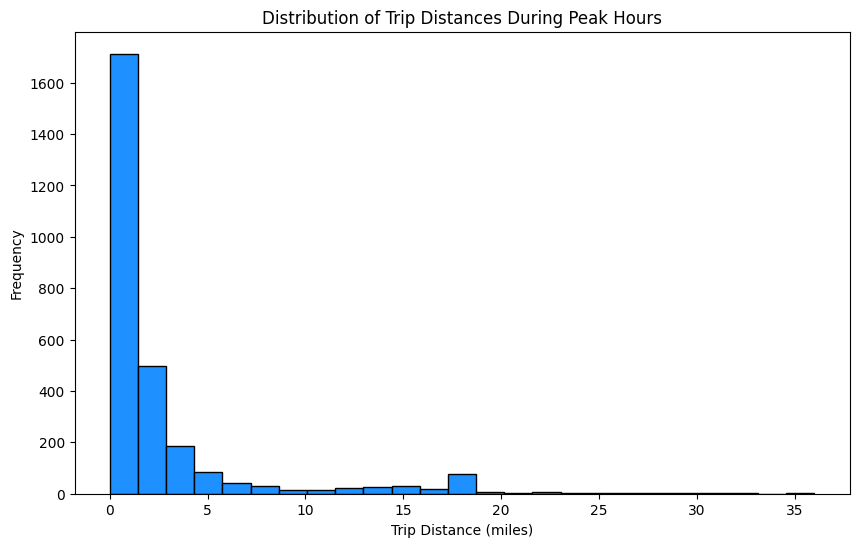

In [66]:
# Filter data to include only peak hours (e.g., assuming peak hours are 17:00 - 19:00)
peak_hours_data = df[df['trip_start_hour'].isin([17, 18, 19])]

# Plotting a histogram for trip distances during peak hours
plt.figure(figsize=(10, 6))
plt.hist(peak_hours_data['trip_miles'].dropna(), bins=25, color='dodgerblue', edgecolor='black')
plt.title("Distribution of Trip Distances During Peak Hours")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

(c) Interpretation: Discuss how peak hours combined with distance trends might affect taxi service efficiency (e.g., congestion, longer wait times).

### 2.c Trip Duration and Distance Distribution (3 Marks):

(a) Plot histograms for trip duration and trip distance to display their distributions. What can you infer from each histogram?

(b) Correlation Analysis: Use a scatter plot to show the relationship between trip duration and distance.

(c) Interpretation: Comment on any noticeable outliers or trends, especially patterns that could influence route planning.

2


### 2.d Seasonal Trends in Taxi Usage and Distance (3 Marks):

(a) Use line charts to track the number of trips and average trip distance across months to identify seasonal peaks and lows.


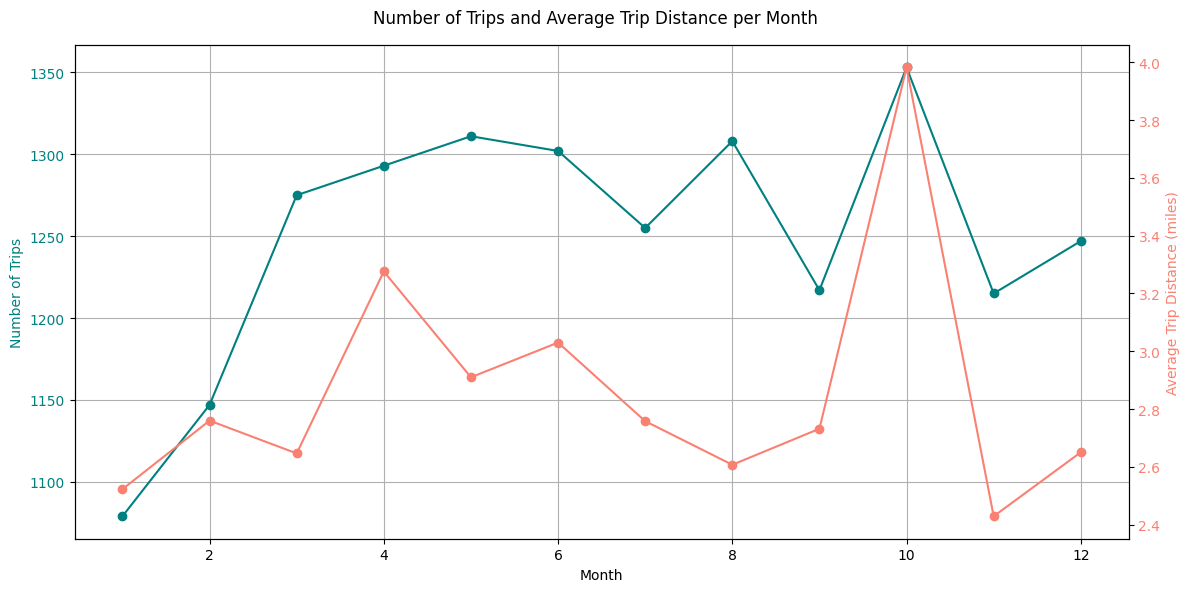

In [ ]:
# Grouping data by month to calculate the number of trips and average trip distance
monthly_data = df.groupby('trip_start_month').agg(
    trip_count=('trip_start_month', 'size'),
    avg_trip_distance=('trip_miles', 'mean')
).reset_index()

# Setting up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for Number of Trips per Month on primary y-axis
ax1.plot(monthly_data['trip_start_month'], monthly_data['trip_count'], marker='o', color='teal', label="Number of Trips")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Trips", color="teal")
ax1.tick_params(axis='y', labelcolor="teal")
ax1.grid()

# Setting up the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['trip_start_month'], monthly_data['avg_trip_distance'], marker='o', color='salmon', label="Average Trip Distance (miles)")
ax2.set_ylabel("Average Trip Distance (miles)", color="salmon")
ax2.tick_params(axis='y', labelcolor="salmon")

# Adding title and legends
fig.suptitle("Number of Trips and Average Trip Distance per Month")
fig.tight_layout()

plt.show()




(b) Interpretation: Explain how these trends could influence resource allocation during high-demand periods (e.g., holiday season).


### 2.e Distance vs. Time of Day (3 Marks):

(a) Plot the variation in trip distances across hours of the day to capture typical distance trends for peak and non-peak hours.

(b) Interpretation: Explain your findings, including any insights into typical distance trends during peak and non-peak hours.
